# Model Training

In [31]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run
import numpy as np

In [32]:
start_run(config_file=Path('config.yml'))

2025-02-16 04:57:24,279: Logging to c:\Users\ybrot\Desktop\course\UROP\GAGEii_modeling\runs\GAGEii-NonStandardized_With_Static_1602_045724\output.log initialized.
2025-02-16 04:57:24,280: ### Folder structure created at c:\Users\ybrot\Desktop\course\UROP\GAGEii_modeling\runs\GAGEii-NonStandardized_With_Static_1602_045724
2025-02-16 04:57:24,280: ### Run configurations for GAGEii-NonStandardized_With_Static
2025-02-16 04:57:24,280: experiment_name: GAGEii-NonStandardized_With_Static
2025-02-16 04:57:24,281: run_dir: c:\Users\ybrot\Desktop\course\UROP\GAGEii_modeling\runs\GAGEii-NonStandardized_With_Static_1602_045724
2025-02-16 04:57:24,281: train_basin_file: basin_list\US_full_basin_list.txt
2025-02-16 04:57:24,282: validation_basin_file: basin_list\US_full_basin_list.txt
2025-02-16 04:57:24,282: test_basin_file: basin_list\US_full_basin_list.txt
2025-02-16 04:57:24,283: train_start_date: 1981-01-01 00:00:00
2025-02-16 04:57:24,283: train_end_date: 2000-12-31 00:00:00
2025-02-16 04:57:

KeyboardInterrupt: 

# Evaluation

In [34]:
run_dir = Path("runs/GAGEii-NonStandardized_With_Static_1602_045724") 
eval_run(run_dir=run_dir, period="test")

with open(run_dir / "test" / "model_epoch062" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)

2025-02-16 07:09:09,428: Using the model weights from runs\GAGEii-NonStandardized_With_Static_1602_045724\model_epoch062.pt


C:\Users\ybrot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub f

# Evaluation:  51%|█████     | 66/130 [00:15<00:14,  4.45it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001E637F0DA80>
Traceback (most recent call last):
  File "C:\Users\ybrot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\data\dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "C:\Users\ybrot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\data\dataloader.py", line 1435, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


# Evaluation: 100%|██████████| 130/130 [00:30<00:00,  4.24it/s]
2025-02-16 07:09:40,124: Stored metrics at runs\GAGEii-NonStandardized_With_Static_1602_045724\test\model_epoch062\test_metrics.csv
2025-02-16 07:09:40,139: Stored results at runs\GAGEii-NonStandardized_With_Static_1602_045724\test\model_epoch062\test_results.p


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `results` is already loaded with subbasin data.

# Extract subbasin keys
subbasin_keys = list(results.keys())

# Initialize lists to store NSE values and subbasin IDs
nse_values = []
subbasin_ids = []

# Loop through each subbasin and collect NSE values
for key in subbasin_keys:
    
    if 'NSE' not in results[key]['1D']:
        print(f"Skipping {key} as it does not have 1D results.")
        continue
    
    nse = results[key]['1D']['NSE']
    nse_values.append(nse)
    subbasin_ids.append(key)

# Convert to a DataFrame for easier manipulation and visualization
nse_df = pd.DataFrame({'Subbasin': subbasin_ids, 'NSE': nse_values})

# Statistical Summary
summary_stats = nse_df['NSE'].describe()


In [36]:
summary_stats   

count    130.000000
mean       0.770685
std        0.141296
min       -0.252001
25%        0.754666
50%        0.810115
75%        0.844347
max        0.907296
Name: NSE, dtype: float64

In [37]:
nse_df['Performance'] = nse_df['NSE'].apply(lambda x: 'Excellent' if x > 0.75 else 'Good' if x >= 0.36 else 'Unsatisfactory' if x >= 0 else 'Negative')
nse_df['Performance'].value_counts()

Performance
Excellent    98
Good         31
Negative      1
Name: count, dtype: int64

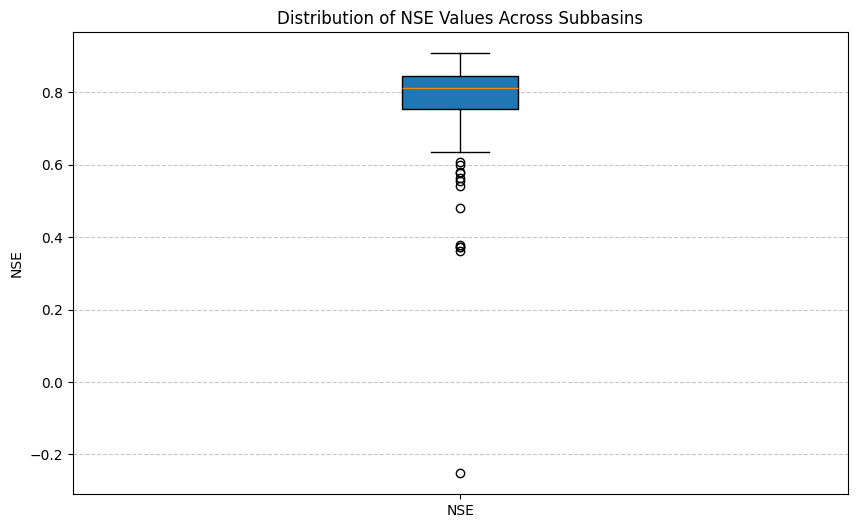

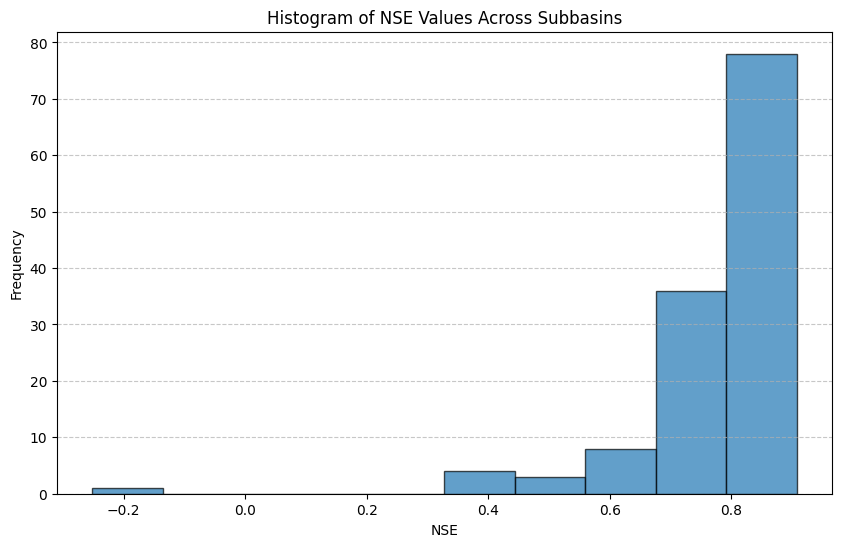

In [38]:

# Plot: Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(nse_df['NSE'], vert=True, patch_artist=True, labels=['NSE'])
plt.title("Distribution of NSE Values Across Subbasins")
plt.ylabel("NSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot: Histogram
plt.figure(figsize=(10, 6))
plt.hist(nse_df['NSE'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of NSE Values Across Subbasins")
plt.xlabel("NSE")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

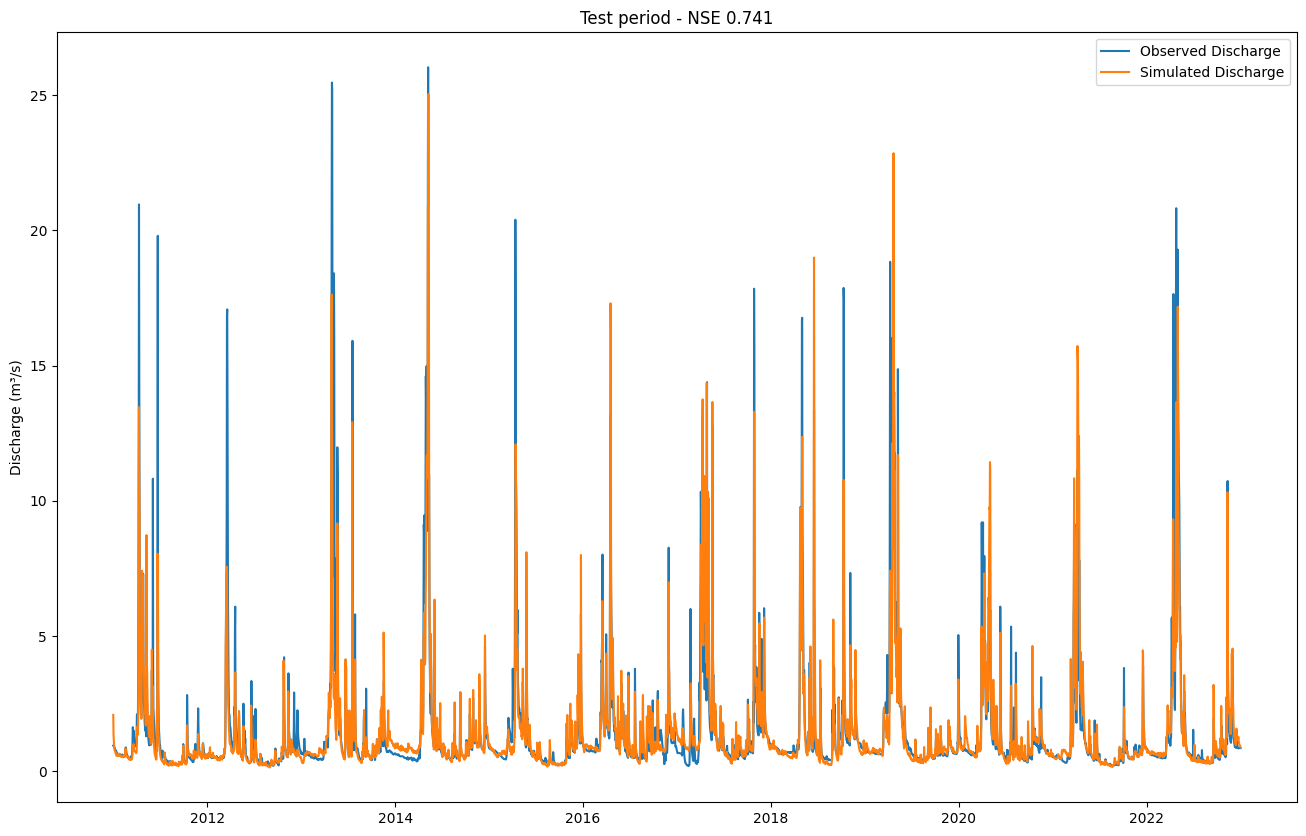

In [41]:
# extract observations and simulations
qobs = results['04043050']['1D']['xr']['discharge_obs']
qsim = results['04043050']['1D']['xr']['discharge_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs, label='Observed Discharge')
ax.plot(qsim['date'], qsim, label='Simulated Discharge')
ax.set_ylabel("Discharge (m³/s)")
ax.set_title(f"Test period - NSE {results['04043050']['1D']['NSE']:.3f}")
ax.legend()  # Add legend to indicate which line is which

In [53]:
 results['04043050']['1D']['xr']['discharge_obs'].values

array([[0.9542694 ],
       [0.96276283],
       [0.96276283],
       ...,
       [0.8636551 ],
       [0.8636551 ],
       [0.8636551 ]], dtype=float32)

# Evaluation after inverse-transforming the predictions

In [77]:
import numpy as np
import pandas as pd

def evaluate_basin_prediction(basin_id: str, run_dir: str, epoch_num: int, 
                              csv_dir: str = "data/csv_files",
                              test_start_date: str = '01/01/2011',
                              test_end_date: str = '31/12/2022',
                              draw_graph: bool = True,
                              min_max: bool = False,
                              skip_eval: bool = False,
                              apply_transformation: bool = True) -> float:
    
    run_dir = Path("runs/"+run_dir) 
    
    if not skip_eval:
        eval_run(run_dir=run_dir, period="test")
    
    # set the epoch number
    epoch_num = str(epoch_num)
    if len(epoch_num) == 1:
        epoch_num = "model_epoch00" + epoch_num
    elif len(epoch_num) == 2:
        epoch_num = "model_epoch0" + epoch_num
    else:
        epoch_num = "model_epoch" + epoch_num
    
    # evaluation
    with open(run_dir / "test" / epoch_num / "test_results.p", "rb") as fp:
        results = pickle.load(fp)
        
    # simulated values
    qsim = results[basin_id]['1D']['xr']['discharge_sim']
    qsim_values = qsim.values
    
    if apply_transformation:
        if min_max:
            min = -13.815510557964274
            max = 8.070835295146114
            
            inverted_qsim_values = qsim_values * (max - min) + min
        else:
            # invert the standardization
            mean = 0.8561527661255196
            var = 5.06157279557463

            inverted_qsim_values = (qsim_values * np.sqrt(var)) + mean
            
        # Invert the log transformation
        inverted_qsim_values = np.exp(inverted_qsim_values) - 1e-6
            
    else:
        inverted_qsim_values = qsim_values
    
    
    
    # Read the CSV file as a dataframe
    csv_file_path = Path(csv_dir) / f"{basin_id}.csv"
    df = pd.read_csv(csv_file_path, index_col='date', parse_dates=True)
    
    # Filter the dataframe for the specified date range and select the "discharge" column
    df_filtered = df.loc[test_start_date:test_end_date, ['discharge']]
    
    # Calculate NSE
    observed_values = df_filtered['discharge'].values
    simulated_values = inverted_qsim_values[:len(observed_values)]  # Ensure the lengths match
    
    mean_observed = np.mean(observed_values)
    nse = 1 - (np.sum((observed_values - simulated_values) ** 2) / np.sum((observed_values - mean_observed) ** 2))
    
    if draw_graph:
        fig, ax = plt.subplots(figsize=(16,10))
        ax.plot(qsim['date'], observed_values, label='Observed Discharge')
        ax.plot(qsim['date'], inverted_qsim_values, label='Simulated Discharge')
        ax.set_ylabel("Discharge (m³/s)")
        ax.set_title(f"Test period - NSE {nse:.3f}")
        ax.legend()
    
    return nse, df_filtered, inverted_qsim_values
    
    

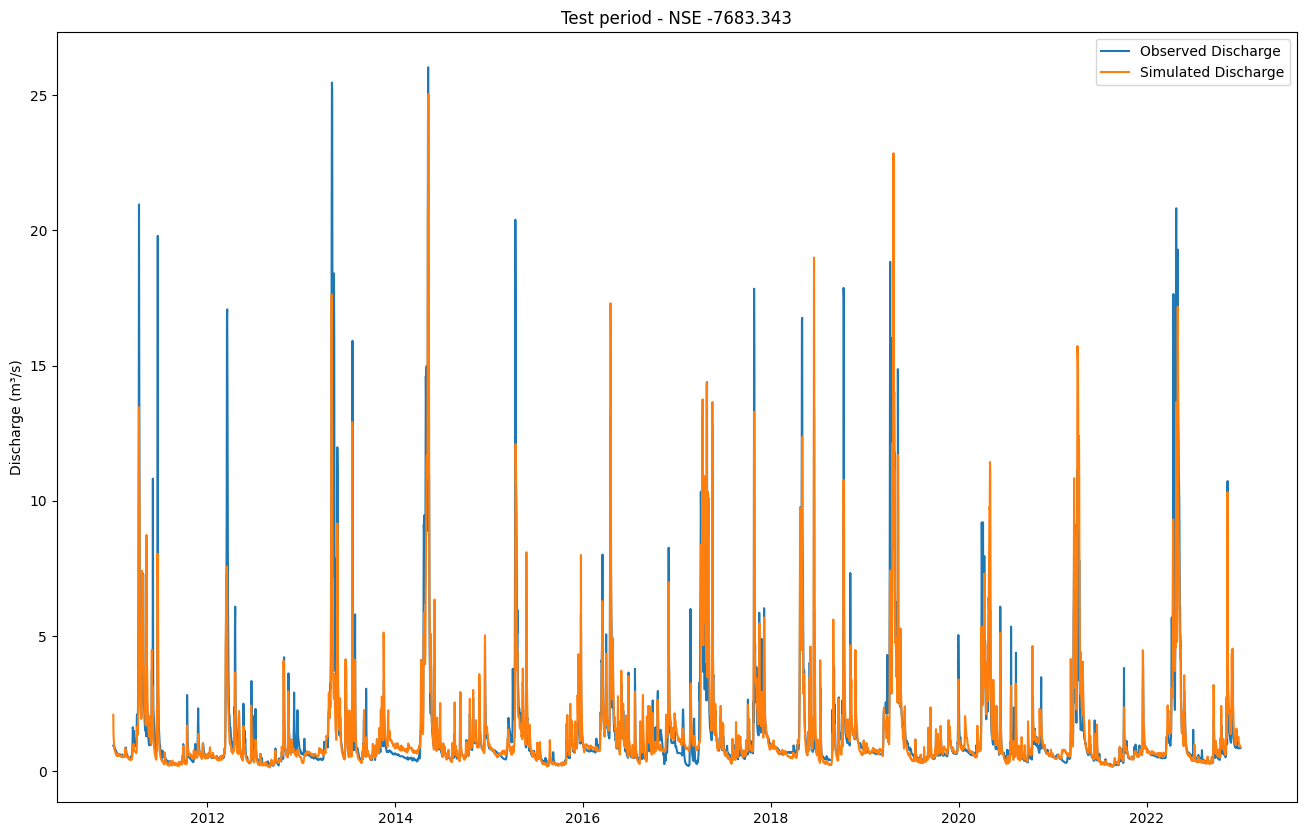

In [78]:
_, filtered_df, sim_values = evaluate_basin_prediction("04043050", "GAGEii-NonStandardized_With_Static_1602_045724", 62, min_max=False, skip_eval=True, apply_transformation=False)

In [80]:
sim_values

array([[2.090416  ],
       [1.3682003 ],
       [1.1164894 ],
       ...,
       [0.94545364],
       [0.91344833],
       [0.8946209 ]], dtype=float32)

In [102]:
mean_observed = np.mean(correct)
nse = 1 - (np.sum((correct - sim_values) ** 2) / np.sum((correct - mean_observed) ** 2))
print(nse)

0.7412019670009613


In [105]:
mean_observed = np.mean(wrong)
nse = 1 - (np.sum((wrong - sim_values) ** 2) / np.sum((wrong - mean_observed) ** 2))
print(nse)

-7683.3427734375


In [103]:
np.sum(correct - wrong)

-0.021697998

In [95]:
correct_df = pd.DataFrame(correct)
correct_df[0].describe()

count    4383.000000
mean        1.433568
std         2.343573
min         0.207277
25%         0.526688
50%         0.741894
75%         1.237434
max        26.022936
Name: 0, dtype: float64

In [96]:
correct

array([[0.9542694 ],
       [0.96276283],
       [0.96276283],
       ...,
       [0.8636551 ],
       [0.8636551 ],
       [0.8636551 ]], dtype=float32)

In [101]:
wrong = wrong.astype(np.float32)
wrong

array([0.95426875, 0.9627637 , 0.9627637 , ..., 0.8636557 , 0.8636557 ,
       0.8636557 ], dtype=float32)

In [91]:
filtered_df['discharge'].describe()

count    4383.000000
mean        1.433568
std         2.343573
min         0.207277
25%         0.526688
50%         0.741894
75%         1.237435
max        26.022936
Name: discharge, dtype: float64

In [63]:
wrong = filtered_df['discharge'].values

In [67]:
correct = results['04043050']['1D']['xr']['discharge_obs'].values

In [69]:
wrong

array([0.95426872, 0.9627637 , 0.9627637 , ..., 0.86365567, 0.86365567,
       0.86365567])

In [68]:
correct

array([[0.9542694 ],
       [0.96276283],
       [0.96276283],
       ...,
       [0.8636551 ],
       [0.8636551 ],
       [0.8636551 ]], dtype=float32)

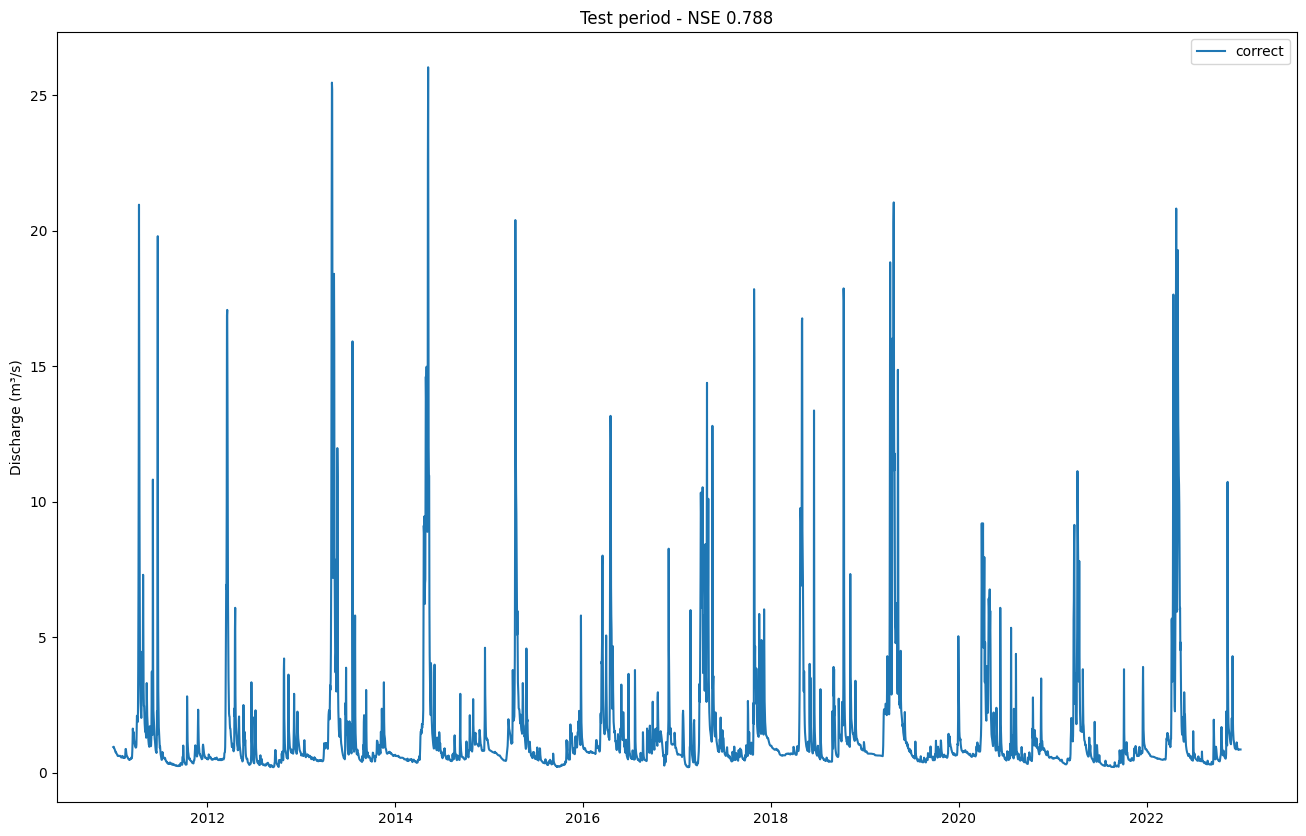

In [73]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qsim['date'], correct, label='correct')
# ax.plot(qsim['date'], wrong, label='wrong')
ax.set_ylabel("Discharge (m³/s)")
ax.set_title(f"Test period - NSE {nse:.3f}")
ax.legend()

### Evaluate Multiple Basins

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def evaluate_multiple_basins(eval_list: str, run_dir: str, epoch_num: int, 
                              csv_dir: str = "data/csv_files",
                              test_start_date: str = '01/01/2011',
                              test_end_date: str = '31/12/2022',
                              draw_graph: bool = True,
                              min_max: bool = False,
                              apply_transformation = True) -> pd.DataFrame:
    
    # Read the basin IDs from the eval_list file
    with open(eval_list, 'r') as file:
        basin_ids = file.read().splitlines()
    
    nse_values = []
    
    evaluate_basin_prediction(basin_id=basin_ids[0], 
                              run_dir=run_dir, 
                              epoch_num=epoch_num,
                              csv_dir=csv_dir,
                              test_start_date=test_start_date,
                              test_end_date=test_end_date,
                              draw_graph=False,
                              min_max=min_max,
                              apply_transformation=apply_transformation)
    
    
    for basin_id in tqdm(basin_ids):
        nse = evaluate_basin_prediction(basin_id, 
                              run_dir=run_dir, 
                              epoch_num=epoch_num,
                              csv_dir=csv_dir,
                              test_start_date=test_start_date,
                              test_end_date=test_end_date,
                              draw_graph=False,
                              min_max=min_max,
                              skip_eval=True,
                              apply_transformation=apply_transformation)
        nse_values.append(nse)
        
    nse_df = pd.DataFrame({'basin_id': basin_ids, 'NSE': nse_values})
    
    if draw_graph:
        
        print(f"Summary Statistic: \n{nse_df['NSE'].describe()}\n")
        
        nse_df['Performance'] = nse_df['NSE'].apply(lambda x: 'Excellent' if x > 0.75 else 'Good' if x >= 0.36 else 'Unsatisfactory' if x >= 0 else 'Negative')
        
        print(f"Performance Summary: \n{nse_df['Performance'].value_counts()}\n")
        
        
    # Plot: Box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(nse_df['NSE'], vert=True, patch_artist=True, labels=['NSE'])
    plt.title("Distribution of NSE Values Across Subbasins")
    plt.ylabel("NSE")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot: Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(nse_df['NSE'], bins=10, edgecolor='black', alpha=0.7)
    plt.title("Histogram of NSE Values Across Subbasins")
    plt.xlabel("NSE")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
        
    
    return nse_df
    
    
    
    

2025-02-16 04:53:00,353: Using the model weights from runs\GAGEii-Standardized_With_Static_1502_125054\model_epoch100.pt


C:\Users\ybrot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub f

# Evaluation: 100%|██████████| 130/130 [00:31<00:00,  4.19it/s]
2025-02-16 04:53:31,419: Stored metrics at runs\GAGEii-Standardized_With_Static_1502_125054\test\model_epoch100\test_metrics.csv
2025-02-16 04:53:31,435: Stored results at runs\GAGEii-Standardized_With_Static_1502_125054\test\model_epoch100\test_results.p


100%|██████████| 130/130 [00:18<00:00,  7.08it/s]

Summary Statistic: 
count      130.000000
mean     -7885.467445
std        808.922426
min     -10567.826219
25%      -8381.626270
50%      -7853.449689
75%      -7285.678024
max      -5797.658297
Name: NSE, dtype: float64

Performance Summary: 
Performance
Negative    130
Name: count, dtype: int64



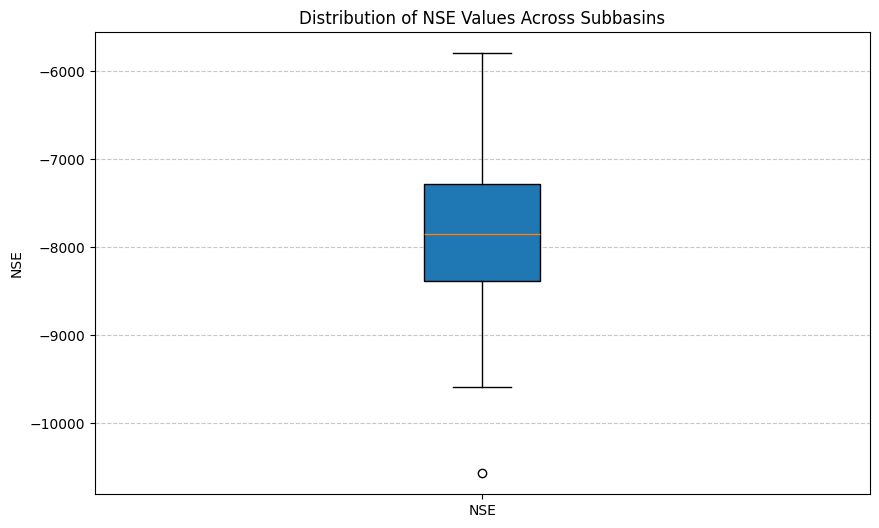

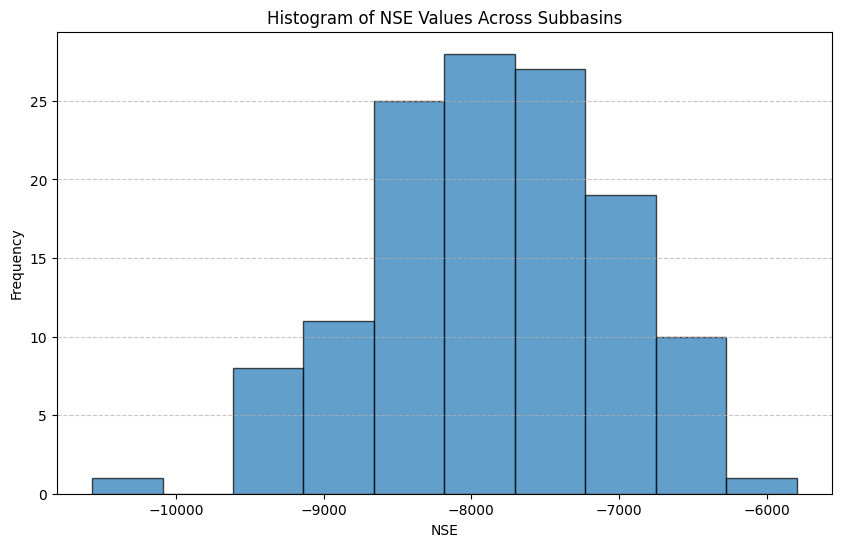

In [28]:
eval_list: str = r"basin_list\US_full_basin_list.txt"
run_dir: str =  "GAGEii-Standardized_With_Static_1502_125054"
epoch_num: int = 100

df = evaluate_multiple_basins(eval_list, run_dir, epoch_num)

-7167.282409966396

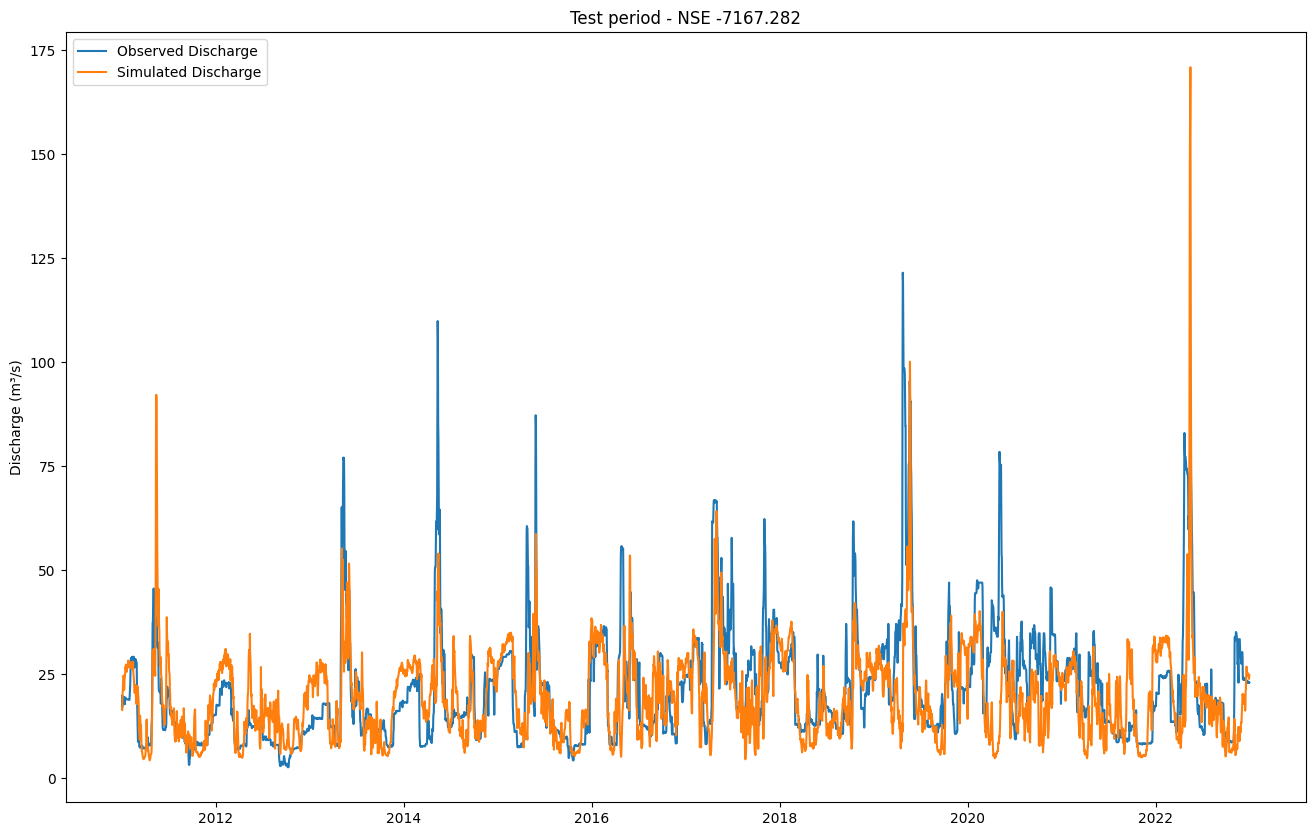

In [29]:
evaluate_basin_prediction("04062500", "GAGEii-Standardized_With_Static_1502_125054", 100, min_max=False, skip_eval=True)

In [ ]:
df

In [23]:
df['NSE'].describe()

count    1.300000e+02
mean    -4.750747e+05
std      2.644864e+06
min     -2.852823e+07
25%     -1.808811e+05
50%     -5.051377e+04
75%     -1.610947e+04
max     -5.845486e+03
Name: NSE, dtype: float64